# Isotonic Regression and Linear Regression

Isotonic regression or monotonic regression is the technique of fitting a free-form line to a sequence of observations such that the fitted line is non-decreasing (or non-increasing) everywhere, and lies as close to the observations as possible. (Wikipedia)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import warnings
warnings.filterwarnings("ignore")

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()

In [4]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,1,1,1,0.012658
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,1,1,1,0.032500
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,0,1,0,0.012106
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,0,0,0,0.000000
2014-01-09,4.20,4.23,4.05,4.09,4.09,30667600,0,0,1,-0.021531


In [5]:
n = len(dataset['Adj Close'])
X = np.array(dataset['Open'].values)
y = dataset['Adj Close'].values

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression

In [7]:
ir=IsotonicRegression()
lr=LinearRegression()
y_ir=ir.fit_transform(X,y)
lr.fit(X[:,np.newaxis],y)

LinearRegression()

Text(0.5, 1.0, 'Isotonic Regression')

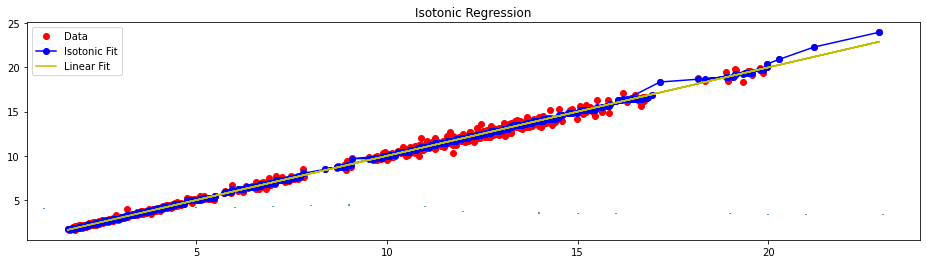

In [8]:
lines=[[[i,y[i]],[i,y_ir[i]]] for i in range(n)]
lc=LineCollection(lines)
plt.figure(figsize=(16,4))
plt.plot(X,y,'r.',markersize=12)
plt.plot(X,y_ir,'b.-',markersize=12)
plt.plot(X,lr.predict(X[:, np.newaxis]), 'y-')
plt.gca().add_collection(lc)
plt.legend(('Data','Isotonic Fit','Linear Fit'))
plt.title("Isotonic Regression and Linear Regression")